# Data Cleaning part II

After gathering and combining the tweets, it was important to remove null values in order to create a VADER-based sentiment analysis for data exploration.

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
pd.read_csv('depressive_unigram_tweets_final.csv')

/Users/anneb/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Unnamed: 0.1,cashtags,hashtags,id,time,tweet
0,0,0,[],[],1.15135E+18,21:25:13,"Wow, my dad yday: “you don’t take those stupid..."
1,1,1,[],[],1.15135E+18,21:25:07,what part of this was really harmfult of a lot...
2,2,2,[],"['#depression', '#uncoveringthenewu', '#change...",1.15135E+18,21:25:06,one of the ways I got through my #depression i...
3,3,3,[],[],1.15135E+18,21:24:55,see i wanna do one of them but they all say th...
4,4,4,[],[],1.15135E+18,21:24:51,IS IT clinical depression or is it the palpabl...
5,5,5,[],[],1.15135E+18,21:24:46,My new mantra for dealing with my anxiety/depr...
6,6,6,[],[],1.15135E+18,21:24:41,Can I get a woot woot for 3 months depression ...
7,7,7,[],[],1.15135E+18,21:24:37,Hope it's working for you. I was on sertralin...
8,8,8,[],[],1.15135E+18,21:24:22,When my depression and anxiety strike at the s...
9,9,9,[],[],1.15135E+18,21:24:20,"I want to leave, but I'm still waiting for you..."


In [3]:
import nltk
nltk.download(['punkt','stopwords'])
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package punkt to /Users/anneb/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/anneb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df2 = pd.read_csv('depressive_unigram_tweets_final.csv')

/Users/anneb/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df2.head()

,Unnamed: 0,Unnamed: 0.1,cashtags,hashtags,id,time,tweet
0,0,0,[],[],1.15135E+18,21:25:13,"Wow, my dad yday: “you don’t take those stupid..."
1,1,1,[],[],1.15135E+18,21:25:07,what part of this was really harmfult of a lot...
2,2,2,[],"['#depression', '#uncoveringthenewu', '#change...",1.15135E+18,21:25:06,one of the ways I got through my #depression i...
3,3,3,[],[],1.15135E+18,21:24:55,see i wanna do one of them but they all say th...
4,4,4,[],[],1.15135E+18,21:24:51,IS IT clinical depression or is it the palpabl...


In [6]:
df2.isnull().any().any()  

True

In [7]:
df2.info(null_counts=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2783576 entries, 0 to 2783575
Data columns (total 7 columns):
Unnamed: 0      2783576 non-null object
Unnamed: 0.1    135497 non-null object
cashtags        1650586 non-null object
hashtags        1650586 non-null object
id              1650612 non-null object
time            1650612 non-null object
tweet           1650599 non-null object
dtypes: object(7)
memory usage: 148.7+ MB


In [8]:
df_new = df2[df2['tweet'].notnull()]

In [9]:
df_new.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1650599 entries, 0 to 2783575
Data columns (total 7 columns):
Unnamed: 0      1650599 non-null object
Unnamed: 0.1    135474 non-null object
cashtags        1650586 non-null object
hashtags        1650586 non-null object
id              1650599 non-null object
time            1650599 non-null object
tweet           1650599 non-null object
dtypes: object(7)
memory usage: 100.7+ MB


In [10]:
df_new.isnull().any().any() 

True

In [11]:
df_new['clean_tweet'] = df_new['tweet'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords])) 

/Users/anneb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
df_new.head()

,Unnamed: 0,Unnamed: 0.1,cashtags,hashtags,id,time,tweet,clean_tweet
0,0,0,[],[],1.15135E+18,21:25:13,"Wow, my dad yday: “you don’t take those stupid...","Wow, dad yday: “you don’t take stupid depressi..."
1,1,1,[],[],1.15135E+18,21:25:07,what part of this was really harmfult of a lot...,part really harmfult lot people went every gui...
2,2,2,[],"['#depression', '#uncoveringthenewu', '#change...",1.15135E+18,21:25:06,one of the ways I got through my #depression i...,one ways I got #depression learning dance rain...
3,3,3,[],[],1.15135E+18,21:24:55,see i wanna do one of them but they all say th...,"see wanna one say PTSD, depression, and/or anx..."
4,4,4,[],[],1.15135E+18,21:24:51,IS IT clinical depression or is it the palpabl...,IS IT clinical depression palpable hopelessnes...


In [13]:
df_new['vader_score'] = df_new['clean_tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

/Users/anneb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
df_new.head()


,Unnamed: 0,Unnamed: 0.1,cashtags,hashtags,id,time,tweet,clean_tweet,vader_score
0,0,0,[],[],1.15135E+18,21:25:13,"Wow, my dad yday: “you don’t take those stupid...","Wow, dad yday: “you don’t take stupid depressi...",-0.4122
1,1,1,[],[],1.15135E+18,21:25:07,what part of this was really harmfult of a lot...,part really harmfult lot people went every gui...,-0.8074
2,2,2,[],"['#depression', '#uncoveringthenewu', '#change...",1.15135E+18,21:25:06,one of the ways I got through my #depression i...,one ways I got #depression learning dance rain...,0.7263
3,3,3,[],[],1.15135E+18,21:24:55,see i wanna do one of them but they all say th...,"see wanna one say PTSD, depression, and/or anx...",-0.4588
4,4,4,[],[],1.15135E+18,21:24:51,IS IT clinical depression or is it the palpabl...,IS IT clinical depression palpable hopelessnes...,-0.8316


In [15]:
positive_num = len(df_new[df_new['vader_score'] >=0.05])
#neutral_num = len(df_new[(df_new['vaderReviewScore'] >-0.05) & (df_new['vaderReviewScore']<0.05)])
negative_num = len(df_new[df_new['vader_score']<0.05])

In [16]:
#positive_num,neutral_num, negative_num
positive_num, negative_num

(42745, 1607854)

In [17]:
df_new['vader_sentiment_label']= df_new['vader_score'].map(lambda x:int(1) if x>=0.05 else int(0))

/Users/anneb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
df_new.head()

,Unnamed: 0,Unnamed: 0.1,cashtags,hashtags,id,time,tweet,clean_tweet,vader_score,vader_sentiment_label
0,0,0,[],[],1.15135E+18,21:25:13,"Wow, my dad yday: “you don’t take those stupid...","Wow, dad yday: “you don’t take stupid depressi...",-0.4122,0
1,1,1,[],[],1.15135E+18,21:25:07,what part of this was really harmfult of a lot...,part really harmfult lot people went every gui...,-0.8074,0
2,2,2,[],"['#depression', '#uncoveringthenewu', '#change...",1.15135E+18,21:25:06,one of the ways I got through my #depression i...,one ways I got #depression learning dance rain...,0.7263,1
3,3,3,[],[],1.15135E+18,21:24:55,see i wanna do one of them but they all say th...,"see wanna one say PTSD, depression, and/or anx...",-0.4588,0
4,4,4,[],[],1.15135E+18,21:24:51,IS IT clinical depression or is it the palpabl...,IS IT clinical depression palpable hopelessnes...,-0.8316,0


In [19]:
#df_new.loc[df_new['vaderReviewScore'] >=0.00,"vaderSentimentLabel"] = 1
#df_new.loc[df_new['vaderReviewScore']<=-0.00,"vaderSentimentLabel"] = 0

In [20]:
df_new.head()

,Unnamed: 0,Unnamed: 0.1,cashtags,hashtags,id,time,tweet,clean_tweet,vader_score,vader_sentiment_label
0,0,0,[],[],1.15135E+18,21:25:13,"Wow, my dad yday: “you don’t take those stupid...","Wow, dad yday: “you don’t take stupid depressi...",-0.4122,0
1,1,1,[],[],1.15135E+18,21:25:07,what part of this was really harmfult of a lot...,part really harmfult lot people went every gui...,-0.8074,0
2,2,2,[],"['#depression', '#uncoveringthenewu', '#change...",1.15135E+18,21:25:06,one of the ways I got through my #depression i...,one ways I got #depression learning dance rain...,0.7263,1
3,3,3,[],[],1.15135E+18,21:24:55,see i wanna do one of them but they all say th...,"see wanna one say PTSD, depression, and/or anx...",-0.4588,0
4,4,4,[],[],1.15135E+18,21:24:51,IS IT clinical depression or is it the palpabl...,IS IT clinical depression palpable hopelessnes...,-0.8316,0


In [22]:
df_new.drop(['Unnamed: 0.1', 'id', 'time', 'tweet', ], axis = 1, inplace = True)

/Users/anneb/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [24]:
df_new = df_new[['Unnamed: 0', 'vader_sentiment_label', 'vader_score', 'clean_tweet']]

In [25]:
df_new.head()

,Unnamed: 0,vader_sentiment_label,vader_score,clean_tweet
0,0,0,-0.4122,"Wow, dad yday: “you don’t take stupid depressi..."
1,1,0,-0.8074,part really harmfult lot people went every gui...
2,2,1,0.7263,one ways I got #depression learning dance rain...
3,3,0,-0.4588,"see wanna one say PTSD, depression, and/or anx..."
4,4,0,-0.8316,IS IT clinical depression palpable hopelessnes...


In [170]:
positive_num = len(df_new[df_new['vader_score'] >=0.05])
neutral_num = len(df_new[(df_new['vader_score'] >-0.05) & (df_new['vader_score']<0.05)])
negative_num = len(df_new[df_new['vader_score']<=-0.05])

In [27]:
positive_num,neutral_num, negative_num

(42745, 1493208, 114646)

In [28]:
df_new.to_csv('vader_processed_final.csv')

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import nltk
from nltk.corpus import stopwords
import re
from nltk import bigrams
import networkx as nx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [42]:
df_new['text'] = df_new['clean_tweet']

In [44]:
df_new['text']

0          Wow, dad yday: “you don’t take stupid depressi...
1          part really harmfult lot people went every gui...
2          one ways I got #depression learning dance rain...
3          see wanna one say PTSD, depression, and/or anx...
4          IS IT clinical depression palpable hopelessnes...
5          My new mantra dealing anxiety/depression overa...
6          Can I get woot woot 3 months depression medica...
7          Hope working you. I sertraline year helped dep...
8          When depression anxiety strike time I can’t an...
9          I want leave, I'm still waiting legalize Assis...
10                                    lrt FUCKING DEPRESSION
11         If you’re new mother tired postpartum depressi...
12         Currently 5:23 I’ve got depression Rangers cou...
13         omg wish I could swim cause I'm gonna drown de...
14         I don’t talk much unless you’re close FUCK anx...
15         🚨🚨🚨 If someone help suggesting I respond/say/w...
16         luv 2 start c

In [45]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [48]:
all_tweets_no_urls = [remove_url(tweet) for tweet in df_new['text']]
all_tweets_no_urls[:5]

['Wow dad yday you dont take stupid depression drugs anymore though you Because theyre absolute worst thing and never need them Aint great family supportive My moms sisters stance similar btw',
 'part really harmfult lot people went every guideline understand 13rw horror show supposed insight depression mental illness overall helpful public narrative topic',
 'one ways I got depression learning dance rain It source strength stronger circumstances UncoveringthenewU ChangeYourMindChangeYourCircumstances pictwittercom3vxKuQ0DvD',
 'see wanna one say PTSD depression andor anxiety play LIKEE',
 'IS IT clinical depression palpable hopelessness generation']

In [82]:
#lower_case = [word.lower() for word in df_new['text']]
sentences = df_new['text']

In [83]:
all_tweets_no_urls[0].split()

['Wow',
 'dad',
 'yday',
 'you',
 'dont',
 'take',
 'stupid',
 'depression',
 'drugs',
 'anymore',
 'though',
 'you',
 'Because',
 'theyre',
 'absolute',
 'worst',
 'thing',
 'and',
 'never',
 'need',
 'them',
 'Aint',
 'great',
 'family',
 'supportive',
 'My',
 'moms',
 'sisters',
 'stance',
 'similar',
 'btw']

In [50]:
all_tweets_no_urls[0].lower().split()

['wow',
 'dad',
 'yday',
 'you',
 'dont',
 'take',
 'stupid',
 'depression',
 'drugs',
 'anymore',
 'though',
 'you',
 'because',
 'theyre',
 'absolute',
 'worst',
 'thing',
 'and',
 'never',
 'need',
 'them',
 'aint',
 'great',
 'family',
 'supportive',
 'my',
 'moms',
 'sisters',
 'stance',
 'similar',
 'btw']

In [51]:
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]

[['wow',
  'dad',
  'yday',
  'you',
  'dont',
  'take',
  'stupid',
  'depression',
  'drugs',
  'anymore',
  'though',
  'you',
  'because',
  'theyre',
  'absolute',
  'worst',
  'thing',
  'and',
  'never',
  'need',
  'them',
  'aint',
  'great',
  'family',
  'supportive',
  'my',
  'moms',
  'sisters',
  'stance',
  'similar',
  'btw'],
 ['part',
  'really',
  'harmfult',
  'lot',
  'people',
  'went',
  'every',
  'guideline',
  'understand',
  '13rw',
  'horror',
  'show',
  'supposed',
  'insight',
  'depression',
  'mental',
  'illness',
  'overall',
  'helpful',
  'public',
  'narrative',
  'topic']]

In [52]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[('i', 65848),
 ('lonely', 55378),
 ('smile', 42634),
 ('wide', 42271),
 ('suicide', 39566),
 ('im', 29153),
 ('depression', 26013),
 ('like', 14866),
 ('depressed', 14064),
 ('people', 11913),
 ('hopeless', 11236),
 ('the', 10641),
 ('you', 10512),
 ('feel', 10500),
 ('its', 9617)]

In [53]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,i,65848
1,lonely,55378
2,smile,42634
3,wide,42271
4,suicide,39566


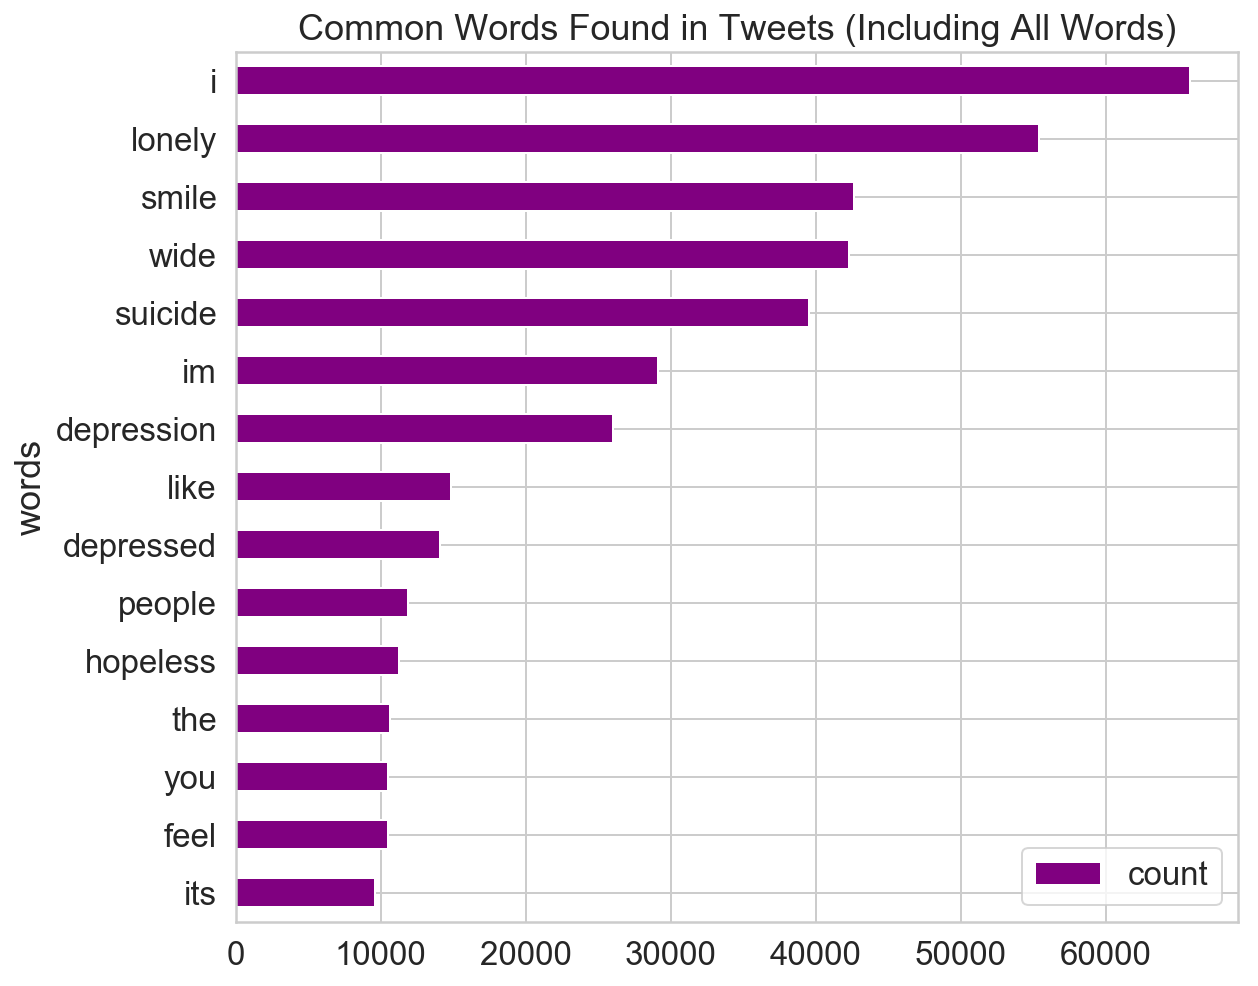

In [54]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()


In [56]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]

['some',
 'once',
 'needn',
 'an',
 "shouldn't",
 'any',
 'then',
 'very',
 'it',
 'yourselves']

In [57]:
words_in_tweet[0]


['wow',
 'dad',
 'yday',
 'you',
 'dont',
 'take',
 'stupid',
 'depression',
 'drugs',
 'anymore',
 'though',
 'you',
 'because',
 'theyre',
 'absolute',
 'worst',
 'thing',
 'and',
 'never',
 'need',
 'them',
 'aint',
 'great',
 'family',
 'supportive',
 'my',
 'moms',
 'sisters',
 'stance',
 'similar',
 'btw']

In [58]:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[0]

['wow',
 'dad',
 'yday',
 'dont',
 'take',
 'stupid',
 'depression',
 'drugs',
 'anymore',
 'though',
 'theyre',
 'absolute',
 'worst',
 'thing',
 'never',
 'need',
 'aint',
 'great',
 'family',
 'supportive',
 'moms',
 'sisters',
 'stance',
 'similar',
 'btw']

In [59]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

[('lonely', 55378),
 ('smile', 42634),
 ('wide', 42271),
 ('suicide', 39566),
 ('im', 29153),
 ('depression', 26013),
 ('like', 14866),
 ('depressed', 14064),
 ('people', 11913),
 ('hopeless', 11236),
 ('feel', 10500),
 ('get', 8998),
 ('one', 8971),
 ('de', 8204),
 ('know', 8041)]

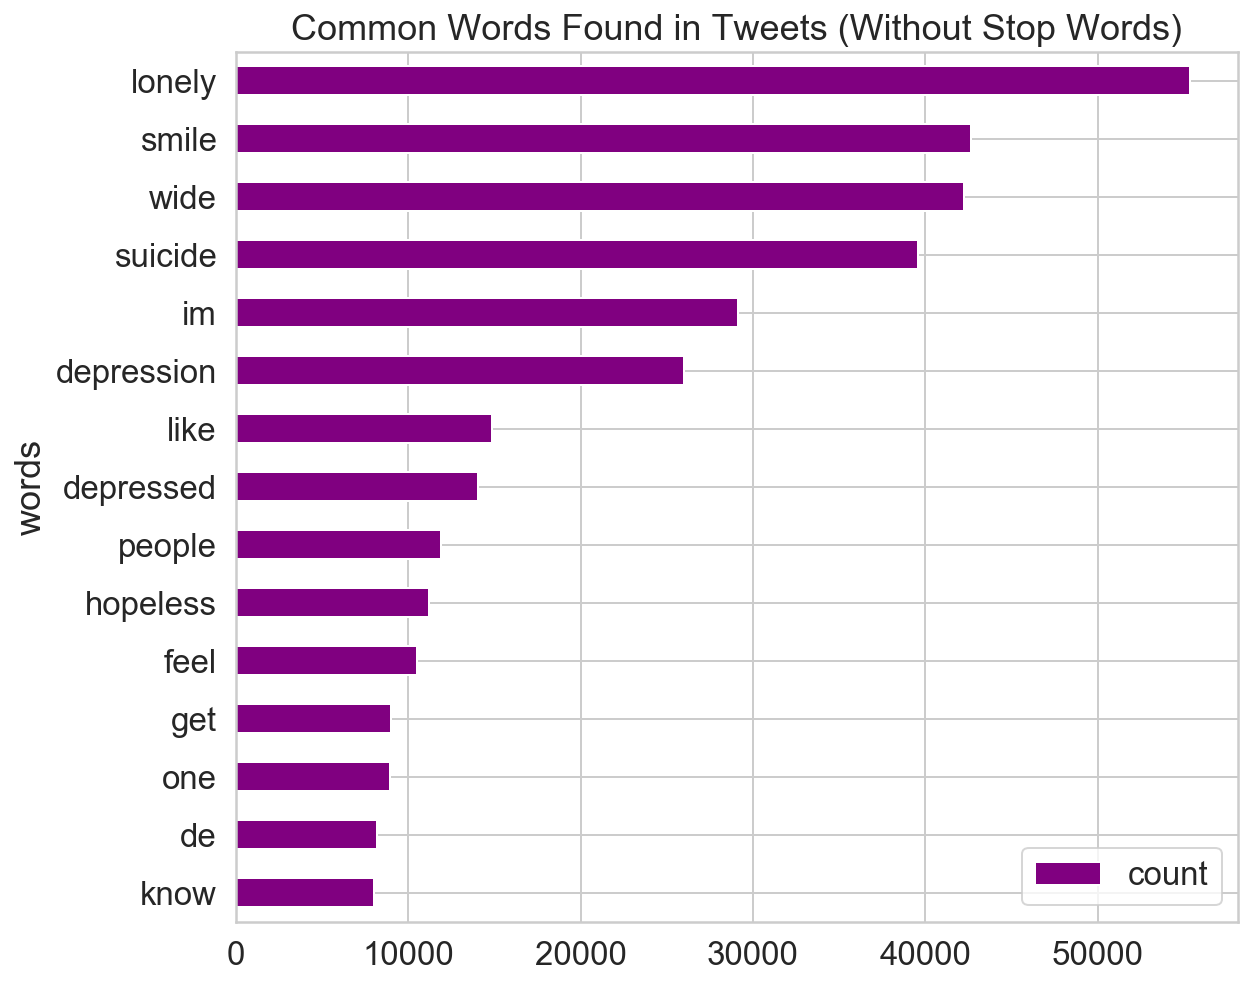

In [60]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

In [61]:
collection_words = ['im', 'de', 'like', 'one']
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

In [62]:
tweets_nsw[0]


['wow',
 'dad',
 'yday',
 'dont',
 'take',
 'stupid',
 'depression',
 'drugs',
 'anymore',
 'though',
 'theyre',
 'absolute',
 'worst',
 'thing',
 'never',
 'need',
 'aint',
 'great',
 'family',
 'supportive',
 'moms',
 'sisters',
 'stance',
 'similar',
 'btw']

In [63]:
tweets_nsw_nc[0]


['wow',
 'dad',
 'yday',
 'dont',
 'take',
 'stupid',
 'depression',
 'drugs',
 'anymore',
 'though',
 'theyre',
 'absolute',
 'worst',
 'thing',
 'never',
 'need',
 'aint',
 'great',
 'family',
 'supportive',
 'moms',
 'sisters',
 'stance',
 'similar',
 'btw']

In [64]:
# Flatten list of words in clean tweets
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(15)

[('lonely', 55378),
 ('smile', 42634),
 ('wide', 42271),
 ('suicide', 39566),
 ('depression', 26013),
 ('depressed', 14064),
 ('people', 11913),
 ('hopeless', 11236),
 ('feel', 10500),
 ('get', 8998),
 ('know', 8041),
 ('dont', 7855),
 ('time', 7433),
 ('life', 6812),
 ('love', 6585)]

In [65]:
len(counts_nsw_nc)


125585

In [ ]:
mean(counts_nsw_nc)

In [66]:
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(15),
                             columns=['words', 'count'])
clean_tweets_ncw.head()


,words,count
0,lonely,55378
1,smile,42634
2,wide,42271
3,suicide,39566
4,depression,26013


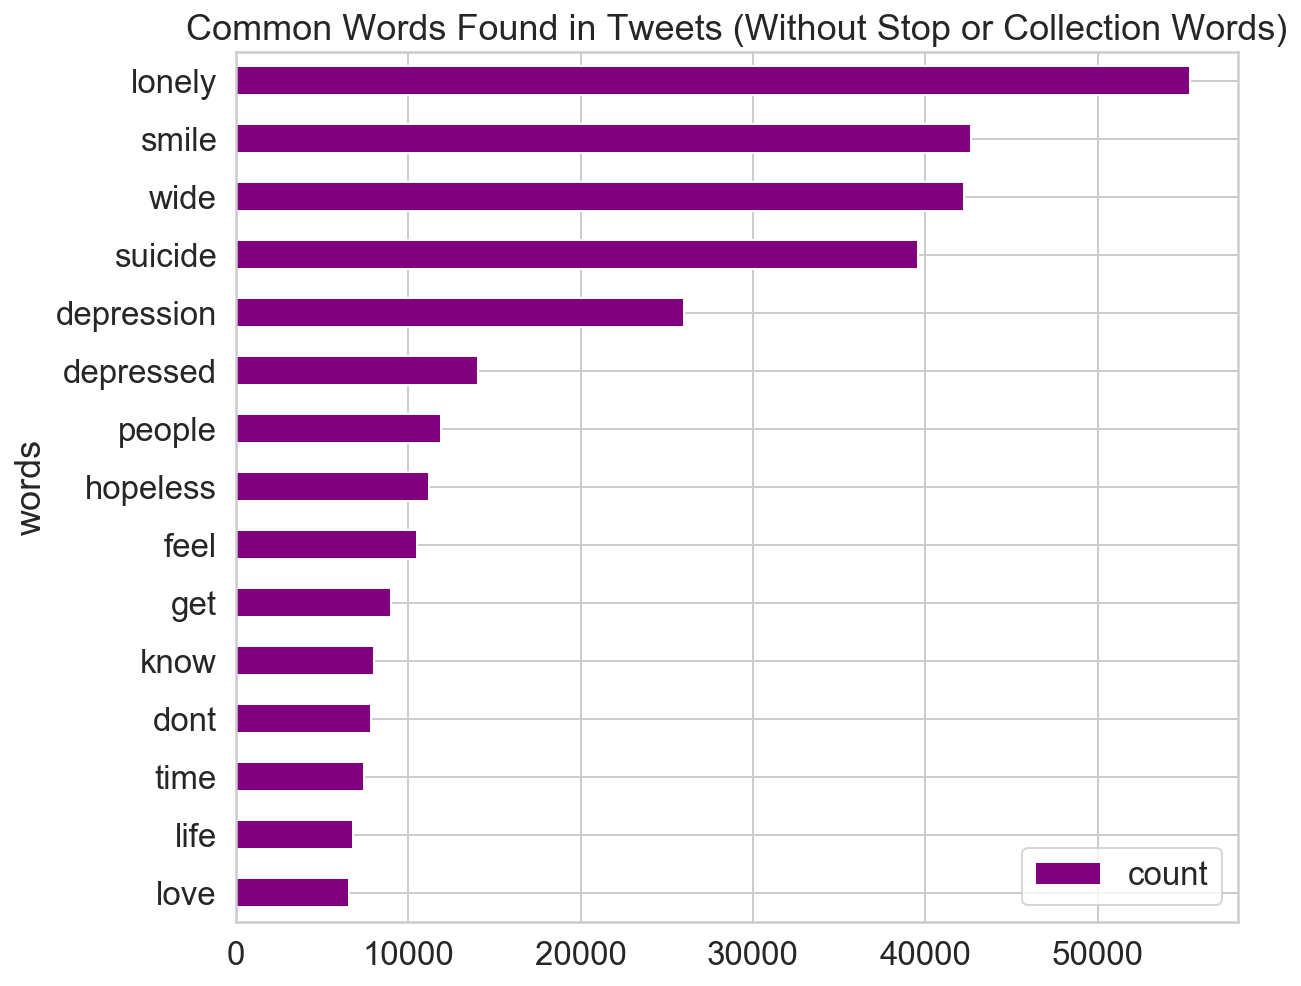

In [67]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)")

plt.show()

In [69]:
from nltk import bigrams

# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw_nc]

# View bigrams for the first tweet
terms_bigram[0]

[('wow', 'dad'),
 ('dad', 'yday'),
 ('yday', 'dont'),
 ('dont', 'take'),
 ('take', 'stupid'),
 ('stupid', 'depression'),
 ('depression', 'drugs'),
 ('drugs', 'anymore'),
 ('anymore', 'though'),
 ('though', 'theyre'),
 ('theyre', 'absolute'),
 ('absolute', 'worst'),
 ('worst', 'thing'),
 ('thing', 'never'),
 ('never', 'need'),
 ('need', 'aint'),
 ('aint', 'great'),
 ('great', 'family'),
 ('family', 'supportive'),
 ('supportive', 'moms'),
 ('moms', 'sisters'),
 ('sisters', 'stance'),
 ('stance', 'similar'),
 ('similar', 'btw')]

In [70]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('smile', 'wide'), 42185),
 (('afraid', 'loneliness'), 4641),
 (('feel', 'lonely'), 3541),
 (('suicide', 'squad'), 2769),
 (('commit', 'suicide'), 2624),
 (('committed', 'suicide'), 1685),
 (('feeling', 'lonely'), 1645),
 (('mental', 'health'), 1398),
 (('hopeless', 'romantic'), 1347),
 (('anxiety', 'depression'), 1337),
 (('suicide', 'bomber'), 1320),
 (('depression', 'anxiety'), 1278),
 (('sad', 'lonely'), 1181),
 (('social', 'media'), 958),
 (('get', 'lonely'), 922),
 (('suicide', 'prevention'), 841),
 (('committing', 'suicide'), 838),
 (('seasonal', 'depression'), 806),
 (('female', 'suicide'), 760),
 (('dont', 'know'), 741)]

In [71]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(smile, wide)",42185
1,"(afraid, loneliness)",4641
2,"(feel, lonely)",3541
3,"(suicide, squad)",2769
4,"(commit, suicide)",2624
5,"(committed, suicide)",1685
6,"(feeling, lonely)",1645
7,"(mental, health)",1398
8,"(hopeless, romantic)",1347
9,"(anxiety, depression)",1337


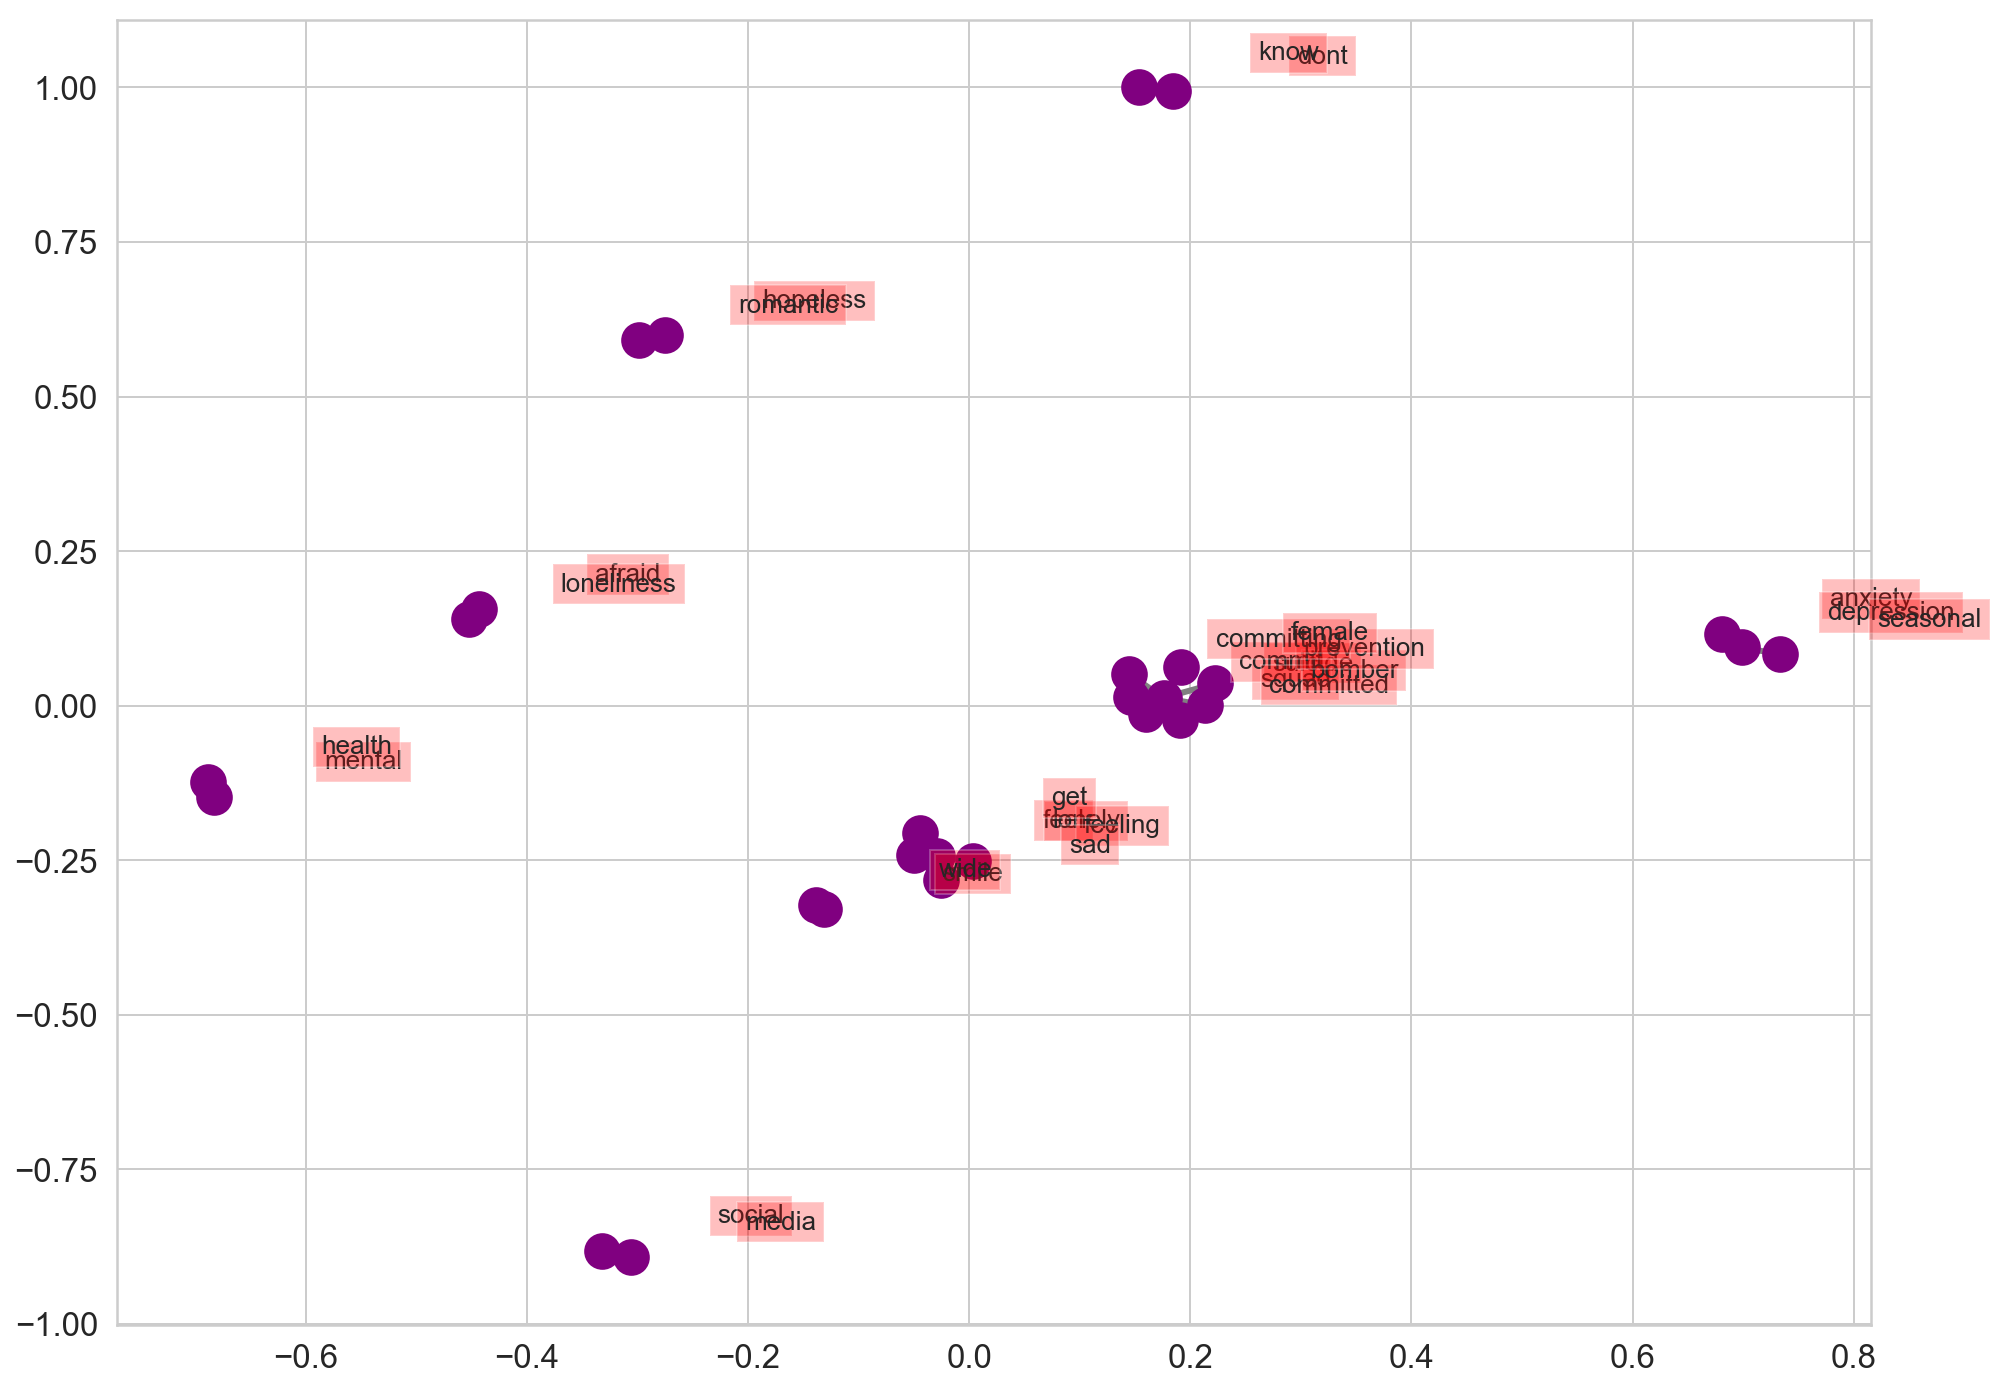

In [159]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

fig, ax = plt.subplots(figsize=(14, 12))

pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

In [91]:
train = pd.read_csv('depressive_unigram_tweets_final.csv')

In [92]:
train.head()

,Unnamed: 0,Unnamed: 0.1,cashtags,hashtags,id,time,tweet
0,0,0,[],[],1.15135E+18,21:25:13,"Wow, my dad yday: “you don’t take those stupid..."
1,1,1,[],[],1.15135E+18,21:25:07,what part of this was really harmfult of a lot...
2,2,2,[],"['#depression', '#uncoveringthenewu', '#change...",1.15135E+18,21:25:06,one of the ways I got through my #depression i...
3,3,3,[],[],1.15135E+18,21:24:55,see i wanna do one of them but they all say th...
4,4,4,[],[],1.15135E+18,21:24:51,IS IT clinical depression or is it the palpabl...


In [110]:
train['word_count'] = train['tweet'].apply(lambda x: int(len(str(x).split(" "))))
train[['tweet','word_count']].head()

,tweet,word_count
0,"Wow, my dad yday: “you don’t take those stupid...",50
1,what part of this was really harmfult of a lot...,51
2,one of the ways I got through my #depression i...,33
3,see i wanna do one of them but they all say th...,24
4,IS IT clinical depression or is it the palpabl...,13


In [111]:
train['char_count'] = train['tweet'].str.len() ## this also includes spaces
train[['tweet','char_count']].head()

,tweet,char_count
0,"Wow, my dad yday: “you don’t take those stupid...",278.0
1,what part of this was really harmfult of a lot...,274.0
2,one of the ways I got through my #depression i...,235.0
3,see i wanna do one of them but they all say th...,114.0
4,IS IT clinical depression or is it the palpabl...,78.0


In [118]:
char_count = train['tweet'].str.len() ## this also includes spaces
char_count.head()

0    278.0
1    274.0
2    235.0
3    114.0
4     78.0
Name: tweet, dtype: float64

In [119]:
char_count.mean()

39.08271239713583

In [120]:
char_count.median()

28.0

In [121]:
char_count.mode()

0    27.0
dtype: float64

In [136]:
word_counts = train['tweet'].apply(lambda x: int(len(str(x).split(" "))))


In [137]:
word_counts.head()

0    50
1    51
2    33
3    24
4    13
Name: tweet, dtype: int64

In [138]:
word_counts.mean()

4.8869669806033675

In [139]:
word_counts.median()

5.0

In [140]:
word_counts.mode()

0    1
dtype: int64

AttributeError: Unknown property palette

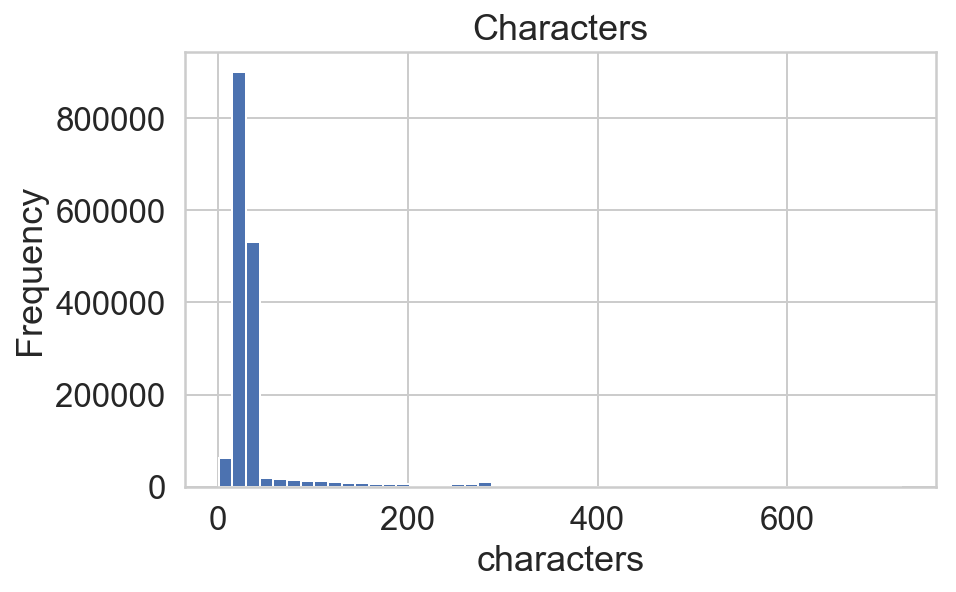

In [169]:
# Plot Histogram on x
x = char_count
plt.hist(x, bins=50)
plt.gca().set(title='Characters', ylabel='Frequency', xlabel='characters');
plt.xlim(0, 300)

(0, 100)

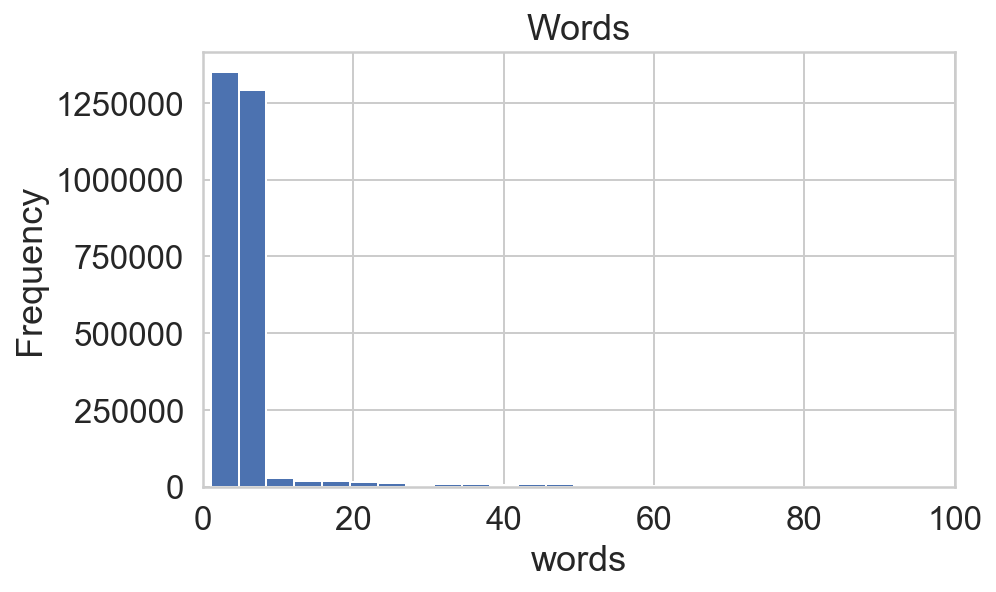

In [154]:
# Plot Histogram on x
x = word_counts
plt.hist(x, bins=50)
plt.gca().set(title='Words', ylabel='Frequency', xlabel='words');
plt.xlim(0, 100)